In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as tk

## 1.1 

![A test image](1.1.png)

## 1.2

$h_1 = max(x_1*w_{11}+x_2*w_{21} + b_1, 0)$

$h_2 = max(x_1*w_{12}+x_2*w_{22} + b_2, 0)$

$h_3 = max(x_1*w_{13}+x_2*w_{23} + b_3, 0)$

$h_4 = max(x_1*w_{14}+x_2*w_{24} + b_4, 0)$


$\hat{y} = \frac{1}{1+e^{-(v1h1+v2h3+v3h3+v4h4+b5)}} $

## 1.3

In [2]:
def sigmoid(z):
  return 1 / (1 + np.exp(-np.array(z)))

def ff_nn_ReLu(X, params):
  (W, b, V, c) = params
  H1 = np.maximum(X @ W + b, 0)
  y_hat = sigmoid(H1 @ V + c)
  return y_hat

## 1.4

In [4]:
W = np.array([[1,-1,0,1],
              [0,0,.5,1]])
b = np.array([0,0,1,0])
V = np.array([[1,0,-1,1]]).T
c = np.array([1])
X = np.array([[1,-1],
              [0,-1],
              [0,1]])

ff_nn_ReLu(X, (W, b, V, c))

array([[0.81757448],
       [0.62245933],
       [0.62245933]])

The probabilities are 0.82, 0.62, 0.62.

## 2.1

$\frac{\partial f}{\partial x} = -3x^2-100(2y^2-x)=-3x^2+100x-200y^2$

$\frac{\partial f}{\partial y} = 100*4y(2y^2-x) = 800y^3-400xy$

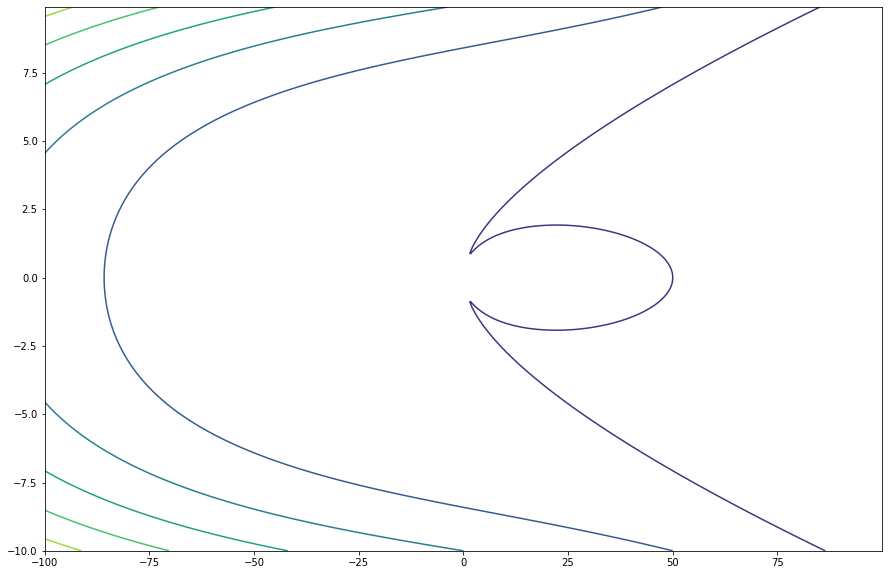

In [3]:
delta = 0.1
x = np.arange(-100.0, 100.0, delta)
y = np.arange(-10.0, 10.0, delta)

X, Y = np.meshgrid(x, y)
Z = 3-X**3 + 50 * (2*Y**2 -x)**2


plt.figure(figsize=(15,10))
plt.contour(X,Y,Z)

In [4]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2+100*x-200*y**2
    df_dy = 800*y**3 - 400*x*y
    return np.array([df_dx, df_dy])

In [47]:
def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point is None:
        starting_point = np.random.uniform(-20,20,2)
    
    traj = np.zeros((iterations+1,2))
    traj[0,:] = starting_point
    for i in range(iterations):
        traj[i+1,:] = traj[i,:] - learning_rate*grad_f(traj[i,:])
    return traj

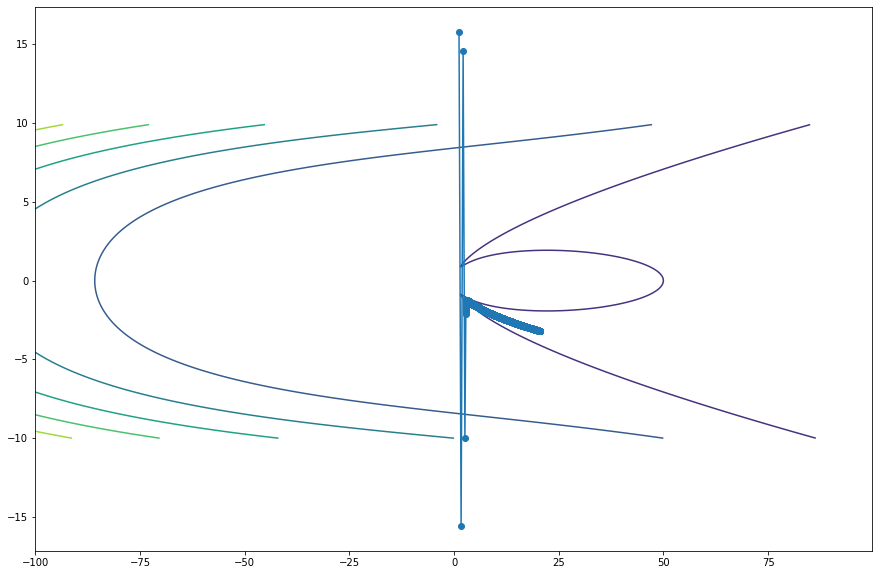

In [50]:
np.random.seed(2333)
traj = grad_descent(iterations=10000, learning_rate=1e-5)

plt.figure(figsize=(15,10))
plt.contour(X,Y,Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

/home/bohachu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bohachu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/home/bohachu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/home/bohachu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


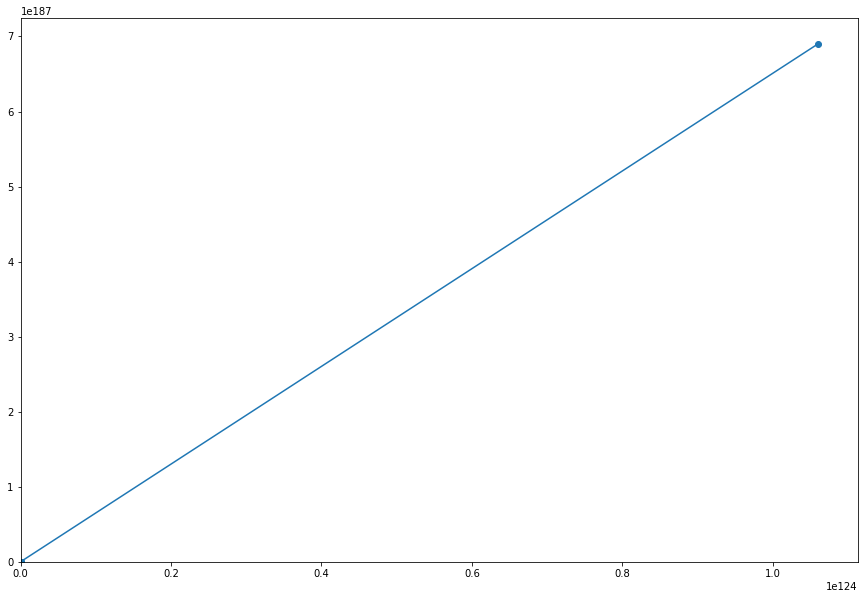

In [52]:
np.random.seed(2333)
traj = grad_descent(iterations=10000, learning_rate=2e-5)

plt.figure(figsize=(15,10))
plt.contour(X,Y,Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

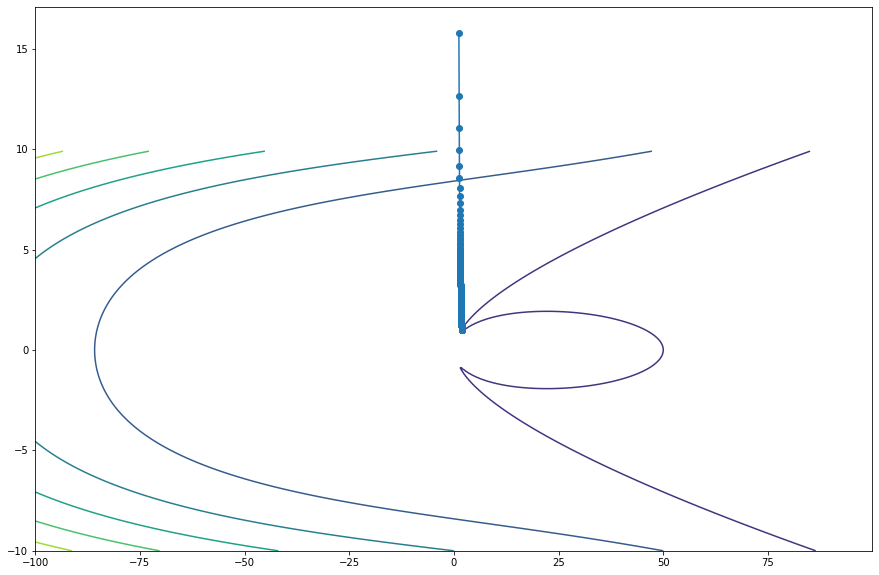

In [54]:
np.random.seed(2333)
traj = grad_descent(iterations=10000, learning_rate=1e-6)

plt.figure(figsize=(15,10))
plt.contour(X,Y,Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## Actually, this funciton has no minimum and gradient descent will not converge.

In [56]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
  # your code here
    if starting_point is None:
        starting_point = np.random.uniform(-20,20,2)
    
    point = starting_point
    traj = [point]
    momentum = np.zeros(2)
    for i in range(iterations):
        grad = grad_f(point)
        momentum = alpha*momentum + epsilon*grad
        point = point - momentum
        traj.append(point)
    return np.array(traj)

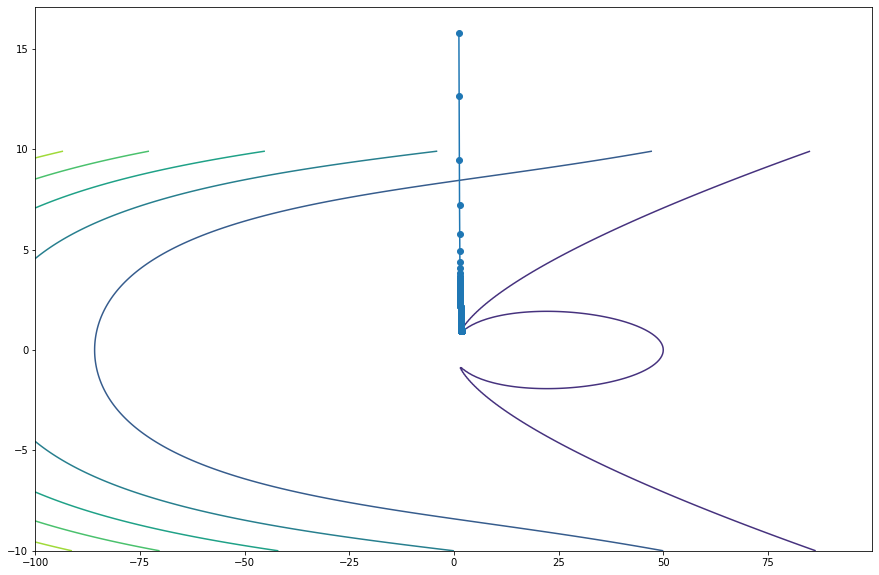

In [57]:
np.random.seed(2333)
traj = grad_descent_with_momentum(iterations=10000, epsilon=1e-6, alpha=.5)

plt.figure(figsize=(15,10))
plt.contour(X,Y,Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

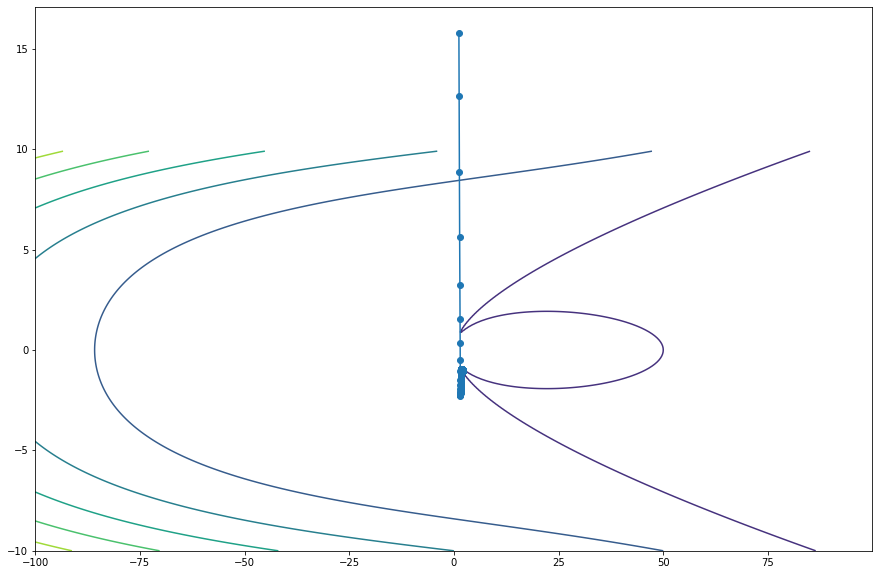

In [58]:
np.random.seed(2333)
traj = grad_descent_with_momentum(iterations=10000, epsilon=1e-6, alpha=.7)

plt.figure(figsize=(15,10))
plt.contour(X,Y,Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

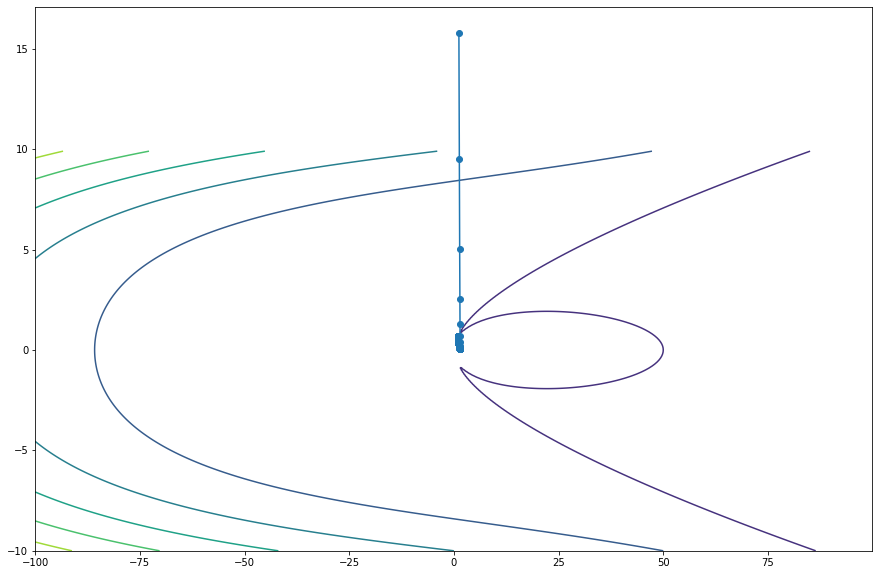

In [61]:
np.random.seed(2333)
traj = grad_descent_with_momentum(iterations=10000, epsilon=2e-6, alpha=.5)

plt.figure(figsize=(15,10))
plt.contour(X,Y,Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## 3.1

$\frac{\partial L}{\partial \hat{y}} = - \frac{y}{\hat{y}} + \frac{1-y}{1-\hat{y}}$

$\frac{\partial L}{\partial b_5} = \frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial b_5} = \frac{\partial L}{\partial \hat{y}} \hat{y}(1-\hat{y}) $

$\frac{\partial L}{\partial v_i} = \frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial v_i} = \frac{\partial L}{\partial \hat{y}} \hat{y}(1-\hat{y}) h_i, \text{for } i = 1..4$

For $i=1,2, j=1,2,3,4$ :

When $h_j>0$:

$\frac{\partial L}{\partial w_{ij}} = \frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial h_j}  \frac{\partial h_j}{\partial w_{ij}} = \frac{\partial L}{\partial \hat{y}} * \hat{y}(1-\hat{y}) v_j*x_i$

$\frac{\partial L}{\partial b_j} = \frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial h_j}  \frac{\partial h_j}{\partial b_j} = \frac{\partial L}{\partial \hat{y}} * \hat{y}(1-\hat{y}) v_j$

else, when $h_j=0$:

$\frac{\partial L}{\partial w_{ij}} = \frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial h_j}  \frac{\partial h_j}{\partial w_{ij}} = 0$

$\frac{\partial L}{\partial b_j} = 0$

## 3.2

In [175]:
def grad_f(X, Y, params):
    """
    X: shape (batch, 2)
    Y: shape (batch, 1)
    """
    batch_size = X.shape[0]
    W, b, V, b5 = params # W (2, 4), b (1, 4), v (4, 1), b5 1
    h = np.maximum(X @ W + b, 0) # (batch, 4)
    y_hat = sigmoid(h @ V + b5) # (batch, 1)
    
    dy = - Y / y_hat + (1-Y)/(1-y_hat)# (batch, 1)
    db5 = (y_hat*(1-y_hat)).T@dy # (1, batch）* (batch, 1)
    
    dydV = y_hat*(1-y_hat)*h # (batch, 4)
    dV = dydV.T @ dy # (4, batch)*(batch, 1) = (4, 1)
    
    dydh = y_hat*(1-y_hat)*V.T # (batch, 4)
    dhdz = (h > 0).astype(np.int) # (batch, 4)
    dzdW = X # (batch, 2)
    dW = dzdW.T@(dy*dydh*dhdz) # (2, 4)
    db = np.ones((1,batch_size))@(dy*dydh*dhdz)
    
    return [dW, db, dV, db5], np.mean(-Y*np.log(y_hat))

In [176]:
W = np.array([[1,-1,0,1],
              [0,0,.5,1]])
b = np.array([0,0,1,0])
V = np.array([[1,0,-1,1]]).T
c = np.array([1])
params = [W, b, V, c]
X = np.array([[1,-1],
              [0,-1],
              [0,1]])
Y = np.array([[1,1,1]]).T

grad_f(X, Y, params)

([array([[-0.18242552,  0.        ,  0.18242552,  0.        ],
         [ 0.18242552,  0.        , -0.18242552, -0.37754067]]),
  array([[-0.18242552,  0.        ,  0.93750686, -0.37754067]]),
  array([[-0.18242552],
         [ 0.        ],
         [-0.8462941 ],
         [-0.37754067]]),
  array([[-0.93750686]])],
 0.38318908211432184)

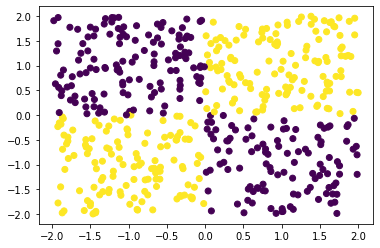

In [177]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y=np.zeros((500,1))
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1

plt.scatter(x[:,0],x[:,1],c=y)

In [185]:
def initialize_params(n_hidden=4):
    W = np.random.normal(size=(2,n_hidden))
    b = np.random.normal(size=(1,n_hidden))
    V = np.random.normal(size=(n_hidden,1))
    c = np.random.normal()
    return [W,b,V,c]

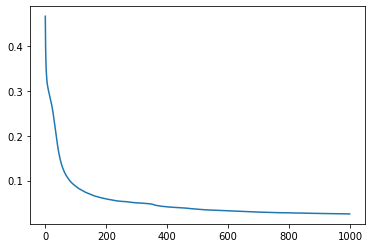

In [218]:
np.random.seed(233)
n_hidden = 4
lr = 1e-3
steps = 1000
params = initialize_params(n_hidden)
losses =[]

for s in range(steps):
    grads, loss = grad_f(x, y, params)
    losses.append(loss)
    for p, g in zip(params, grads):
        p -= lr*g
        
plt.plot(losses)

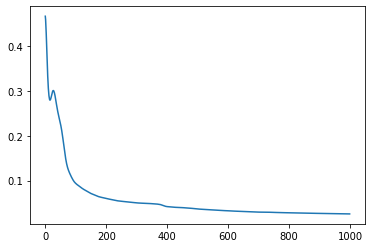

In [219]:
np.random.seed(233)
lr = 1e-3
alpha = 0.9
epsilon = 0.1
steps = 1000
params = initialize_params(n_hidden)
losses =[]

mom = {}
mom[0] = np.zeros((2,n_hidden))
mom[1] = np.zeros((1,n_hidden))
mom[2] = np.zeros((n_hidden,1))
mom[3] = 0

for s in range(steps):
    grads, loss = grad_f(x, y, params)
    losses.append(loss)
    for i, (p, g) in enumerate(zip(params, grads)):
        mom[i] = alpha*mom[i] + epsilon*g
        p -= lr*mom[i]
        
plt.plot(losses)

Gradient descent with momentum converges faster. 

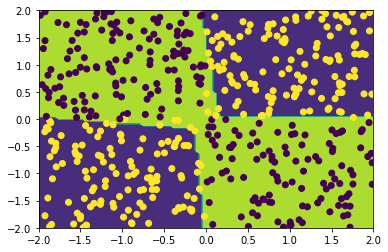

In [220]:
x_grid = np.linspace(-2, 2, 100)
mesh = np.meshgrid(x_grid, x_grid)
X1, X2 = mesh
# yhat = model(xs_grid).numpy().squeeze()
y_hat = ff_nn_ReLu(np.array((X1.ravel(),X2.ravel())).T, params).reshape((100,100))

fig, ax = plt.subplots()
CS = ax.contourf(X1, X2, y_hat<0.7, levels=[0, .25, .5, .75, 1.0])
plt.scatter(x[:,0],x[:,1],c=y)

# plt.imshow(yhat, cmap='coolwarm')
# plt.colorbar()

# binary_preds(model)